## Filters and Convolutions

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Filters

Low Pass Filters (LPF) allows low-frequency components (slow/gradual changes in intensity) to pass through, while removing or attenuating high-frequency components (sudden/rapid changes). It helps in removing noise, blurring images, etc. 

High Pass Filters (HPF) allows high-frequency components (edges, fine details) to pass through, while removing low-frequency components (smooth areas). HPF makes an image look sharper or highlights the edges. Useful for edge detection, feature extraction.

Noise is a high frequency component so LPF can be used to remove it.

### Image Smoothing Techniques (Blurring)

##### 1. Averaging
It is a Low Pass Filter because it blurs the image by averaging surrounding pixels

In [25]:
def show_img(title, image):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

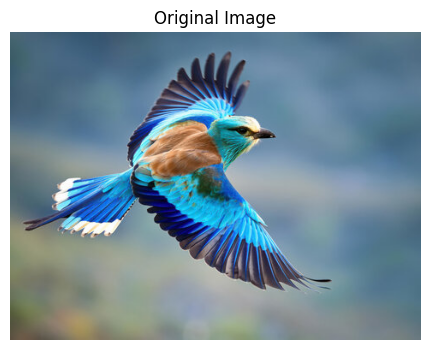

In [26]:
img = cv2.imread('./images/bird.jpg')
show_img('Original Image', img)

General Convolution operation:\
$(I * K)(x,y) = \sum_{m=-a}^{a}\sum_{n=-b}^{b}I(x-m, y-n) \cdot K(m,n)$

For averaging, use a "Normalized Box Filter" (Box Filter is a kernel where all the weights are the same)

$(I * K)(x,y) = \frac{1}{N} \sum_{m=-a}^{a}\sum_{n=-b}^{b}I(x-m, y-n)$



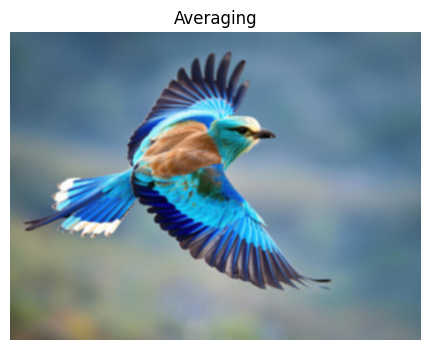

In [27]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)
show_img('Averaging', dst)

##### 2. Gaussian Blurring

Gaussian blurring is highly effective in removing Gaussian noise from an image. Gaussian noise is a type of noise where these random variations follow a Gaussian (normal) distribution.

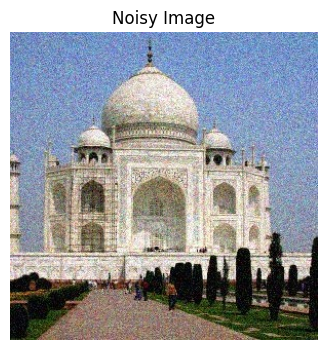

In [28]:
img2 = cv2.imread('./images/noise.jpg')
show_img('Noisy Image', img2)

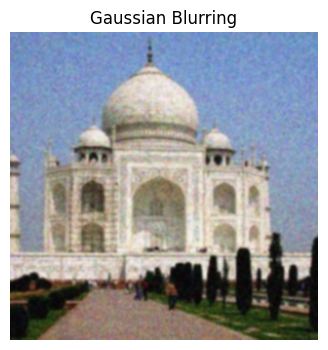

In [29]:
blur = cv2.GaussianBlur(img2,(5,5),0)
show_img('Gaussian Blurring', blur)

##### 3. Median Blurring
Takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image

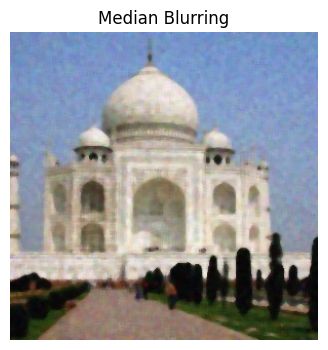

In [33]:
median = cv2.medianBlur(img2,5)
show_img('Median Blurring', median)

##### 4. Bilateral Filter
Bilateral is very effective in noise removal while keeping edges sharp

Why is Bilateral Filter better than Gaussian?\
Gaussian Filter blurs an image by taking a weighted average of neighboring pixels. Bilateral filter is like Gaussian, but also considers intensity similarity (not just spatial closeness). Pixels with similar color/intensity get more weight. Imagine a black–white edge. It won’t mix black and white much, because their intensities are very different. The edge stays sharp.

https://people.csail.mit.edu/sparis/bf_course/slides/03_definition_bf.pdf

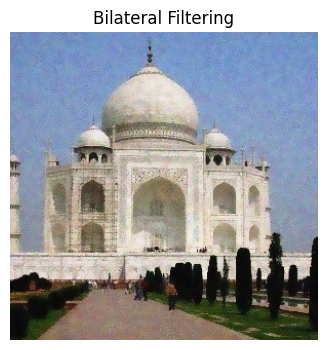

In [30]:
blur = cv2.bilateralFilter(img2,9,75,75)
show_img('Bilateral Filtering', blur)

Other resources:
https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html